* For using TensorFlow It's better to use GPU or Colab Notebooks.
* Here I Preferred Colab Notebooks
* After Selecting the runtime type, Mount the Drive.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Download the fruits.zip folder using the below link

In [2]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-02 09:33:25--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 185.166.143.50, 185.166.143.48, 185.166.143.49, ...
Connecting to bitbucket.org (bitbucket.org)|185.166.143.50|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  17.1MB/s    in 6.9s    

2025-04-02 09:33:34 (14.7 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



* Unzip the dataset for futher usage

In [3]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

* Import the Necessary Libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

* Check the Tensor Flow Version Before Usage

In [5]:
tf.__version__

'2.18.0'

* Load the Image data to mathematical datasets for training, validation, testing using tensforflow.

In [6]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


* Get the Fruits Images from train_set from 3 classes randomly.

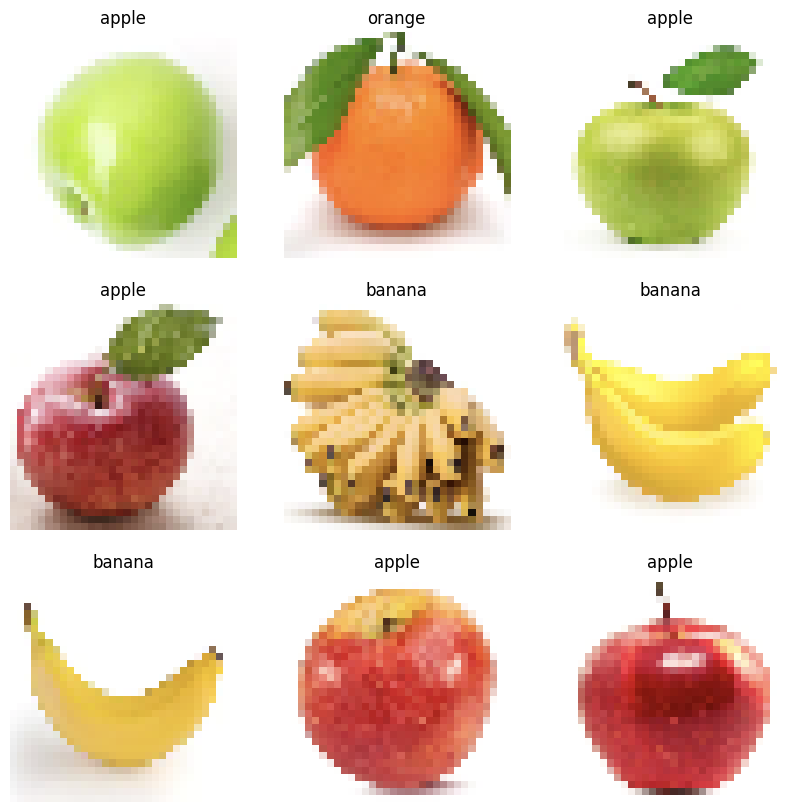

In [7]:
class_names = ["apple", "banana", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

* Build the Sequential Model

In [8]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(64, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(128, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="softmax"),
     tf.keras.layers.Dense(3)
    ]
)

In [9]:
model.compile(
    optimizer="rmsprop",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

* Now Train and Validate the Model using these train_set, validation_set.

In [10]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 20
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.3310 - loss: 1.0992 - val_accuracy: 0.3485 - val_loss: 1.0974
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.3944 - loss: 1.0958 - val_accuracy: 0.3333 - val_loss: 1.0963
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.4071 - loss: 1.0875 - val_accuracy: 0.5606 - val_loss: 1.0528
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5408 - loss: 1.0461 - val_accuracy: 0.7576 - val_loss: 0.9944
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6035 - loss: 0.9957 - val_accuracy: 0.7121 - val_loss: 0.9839
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.7177 - loss: 0.9710 - val_accuracy: 0.6970 - val_loss: 0.9598
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.7531 - loss: 0.9530 - val_accuracy: 0.8333 - val_loss: 0.9310
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7328 - loss: 0.9468 - val_accuracy: 0.6818 

* Evaluate the Model Accuracy & Loss

In [11]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.9520 - loss: 0.6303


[0.6258206963539124, 0.9538461565971375]

* Predict the Image Class of Given real Image with the Model

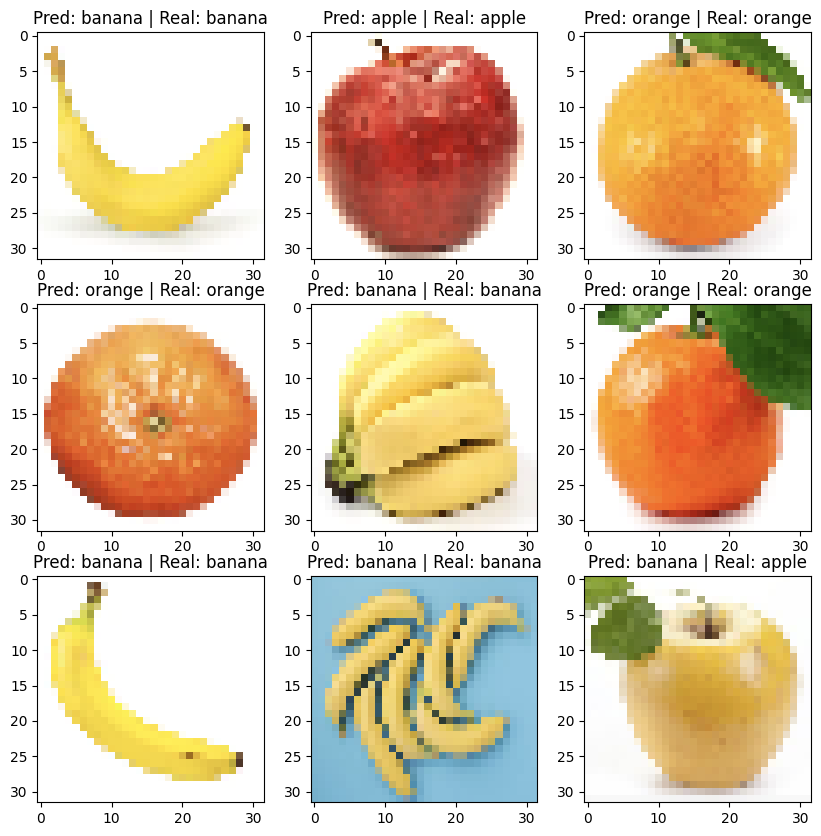

In [12]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

* If we observe last prediction it predicted banana for real apple image.
* We need add more epochs, for improving acuracy.

In [13]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100
)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.9717 - loss: 0.6041 - val_accuracy: 0.8939 - val_loss: 0.6530
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9804 - loss: 0.5838 - val_accuracy: 0.8939 - val_loss: 0.6304
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9700 - loss: 0.5689 - val_accuracy: 0.9545 - val_loss: 0.5675
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9303 - loss: 0.5896 - val_accuracy: 0.9545 - val_loss: 0.5653
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.9769 - loss: 0.5299 - val_accuracy: 0.9697 - val_loss: 0.5243
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9856 - loss: 0.5094 - val_accuracy: 0.9242 - val_loss: 0.5476
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9796 - loss: 0.4962 - val_accuracy: 0.8333 - val_loss: 0.6528
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9652 - loss: 0.5052 - val_accuracy: 0

* Revaluate the Model Accuracy & Loss

In [14]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9718 - loss: 0.1326


[0.172440305352211, 0.9615384340286255]

* Predict the Image Class of Given real Image with the Model

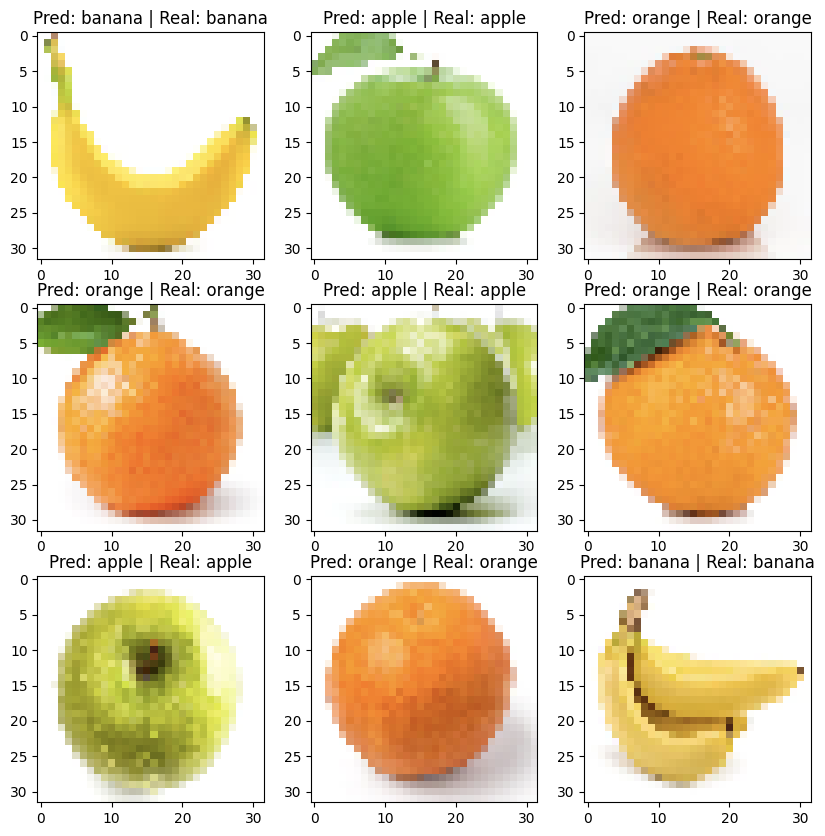

In [15]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

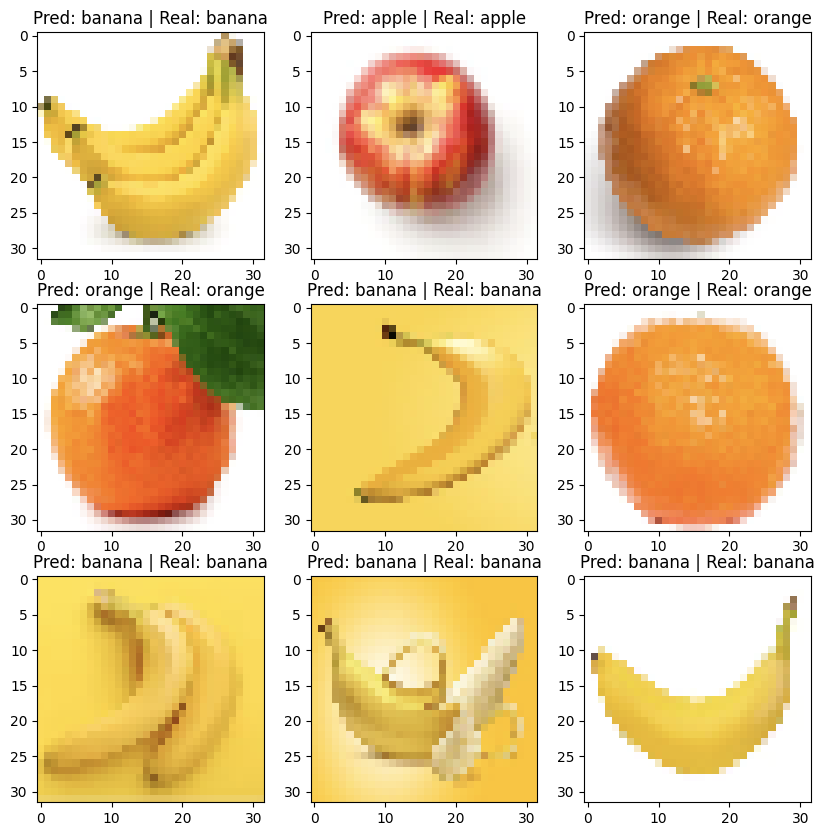

In [16]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

* Save the Model

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpnfw4llo9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137755360755536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755360755152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755360752848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001786768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001786192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001787728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001788112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001789456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001788304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137755001789264: TensorSpec(shape=(), dtype=tf.resource, name=None)
